# Моделирование по электричеству: 
# Движение частицы в поле плоского конденсатора.

### Петренко Людмила, Кусайкина Елизавета М3104


## Формулировка задачи:
Частица влетает в поле конденсатора параллельно пластинам вдоль оси конденсатора. Под действием поля конденсатора частица отклоняется к одной из пластин и к концу пути попадает на неё. Координату, где упала частица можно измерить. 
Создать модель поведения частицы с возможностью изучения её траектории в зависимости от изменяемых параметров системы. 
Определить закон, по которому изменяется траектория движения частицы. Учесть влияние силы тяжести на частицу и визуализировать траекторию движения частицы в виде графика.

Входными данными являются:
1. масса частицы 
2. заряд частицы 
3. расстояние между пластинами конденсатора
4. напряжение на конденсаторе
5. начальная скорость частицы
6. длина конденсатора(опционально)
7. начальная координата по вертикали

### Ввод данных:
По умолчанию частицей в задаче будет считаться электрон.

Масса по умолчанию = 9.109 * 10**(-31) кг

Заряд по умолчанию = -1.60217*10**(-19) Кл

In [917]:
print("Введите массу частицы:")
try:
    m =  9.109 * 10**(12)#int(input())
except ValueError:
    m = 9.109 * 10**(-31)
print("Введите заряд частицы:")
try:
    q = 1.60217*10**(-19) #int(input())
except ValueError:
    q = -1.60217*10**(-19)
print("Введите расстояние между пластинами конденсатора:")
try:
    distance = 0.5 #int(input())
except ValueError:
    distance = 0.05
print("Введите напряжение на конденсаторе:")
try:
    U = 50000 #int(input())
except ValueError:
    U = 500
print("Введите начальную скорость частицы:")
try:
    v_0 = 500000 #int(input())
except ValueError:
    v_0 = 5
try:
    length = 10 #int(input())
except ValueError:
    length = 10**9
print("Введите длину конденсатора:")
try:
    y_enter = 0.1 #int(input())
    if (abs(y_enter) > abs(distance/2)):
        y_enter = 0
except ValueError:
    y_enter = 0
print("Введите начальную координату:")

g = 9.8

Введите массу частицы:
Введите заряд частицы:
Введите расстояние между пластинами конденсатора:
Введите напряжение на конденсаторе:
Введите начальную скорость частицы:
Введите длину конденсатора:
Введите начальную координату:


## Модель:

In [918]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [919]:
a = -g + q*U/(m*distance)

def x(t):
    return (v_0)*t

def y(t):
    return y_enter + (a)*(t*t)/2

if a > 0:
    t_end = math.sqrt((distance - 2*y_enter)/a)
else:
    t_end = math.sqrt((-distance - 2*y_enter)/a)

t_after_end = np.linspace(0, 0)

if x(t_end) > length:
    t_end = length/v_0
    t_after_end = np.linspace(0, distance*10)

t = np.linspace(0, t_end)

if length == 10**9:
    length = x(t_end) + distance/10

def y_after_end(t): #движение под углом к горизонту
    return y(t_end) + (a*t_end)*t + (-g)*(t*t)/2

def x_after_end(t):
    return x(t_end) + (v_0)*t


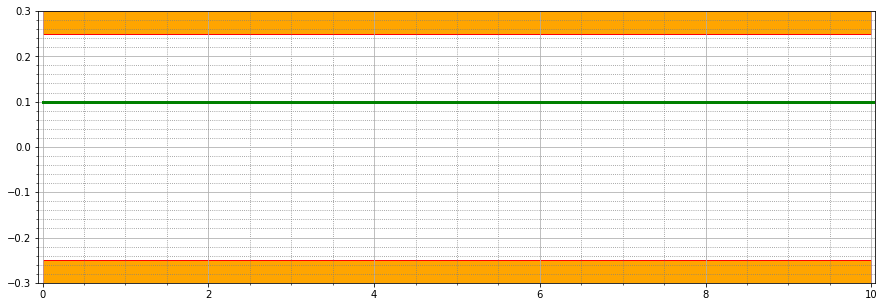

In [920]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1) 

ax.set_xlim((-distance/10, x(t_end) + distance/10))
ax.set_ylim((-distance/2 - distance/10, distance/2 + distance/10))

ax.minorticks_on()
ax.grid(True, which='both')
ax.grid(which='minor', color='gray', linestyle=':')

ax.add_patch(patches.Rectangle((0, distance/2), length, distance/10, edgecolor = 'red', facecolor = 'orange',fill = True))
ax.add_patch(patches.Rectangle((0, -distance/2 - distance/10), length, distance/10, edgecolor = 'red', facecolor = 'orange',fill = True))

line, = ax.plot(x(t), y(t), lw=3, color = "green")
if t_after_end.any() != np.linspace(0, 0).any():
    line_after_end, = ax.plot(x_after_end(t_after_end), y_after_end(t_after_end), lw=3, color = "green")
plt.savefig("большая_масса.jpg")